In [1]:
import sys
sys.path.append('/home/lev/object-centric/edge-generation/models/')
import torch_geometric
import torch
from omegaconf import OmegaConf
from dataloader import PL_DataModule
from models.model import Network

import hydra
import matplotlib.pyplot as plt

from hydra import compose, initialize
from omegaconf import OmegaConf
from sklearn.metrics import confusion_matrix
import numpy as np
# own modules
from dataloader import PL_DataModule
from method import LitModel

initialize(config_path='outputs/2022-02-03/16-59-59/.hydra', job_name="test_app")


hydra.initialize()

In [2]:
def get_dataloader(cfg):
    return PL_DataModule(cfg.dataloader)
def get_model_loaders(weights_path):
    cfg = compose(config_name="config")
    # Setup dataloader and model
    datamodule = get_dataloader(cfg)

    # Obtain feature sizes and number of labels
    batch = next(iter(datamodule.train_dataloader()))
    cfg.model.opt.loader_batches = len(datamodule.train_dataloader())
    cfg.model.insize ,cfg.model.outsize = batch.x.shape[1], torch.unique(batch.y).shape[0]
    model = LitModel(cfg=cfg)
    # upload weights
    state_dict = torch.load(weights_path)['state_dict']
    model.load_state_dict(state_dict)
    return model, datamodule


In [3]:
weights_path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/16-59-59/some_project/2o7cfnqe/checkpoints/epoch=709-step=709.ckpt'

model, datamodule = get_model_loaders(weights_path)

batch = next(iter(datamodule.train_dataloader()))
model.model.loss_function(batch)

Global seed set to 0
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AveragePrecision` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
/opt/anaconda3/envs/lev_eg/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `AUROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


{'loss': tensor(0.0702, dtype=torch.float64, grad_fn=<AddBackward0>),
 'cross_entrop': tensor(0.0576, grad_fn=<NllLossBackward0>),
 'accuracy': tensor(0.9785),
 'f1': tensor([0.9785]),
 'avr_precision': tensor(0.9978),
 'aucroc': tensor(0.9997),
 'temperatue_0': tensor(1.8626),
 'temperatue_1': tensor(1.9298),
 'temperatue_2': tensor(1.5702),
 'loss_prob': tensor(0.0126, dtype=torch.float64, grad_fn=<MulBackward0>)}

mean prob: 


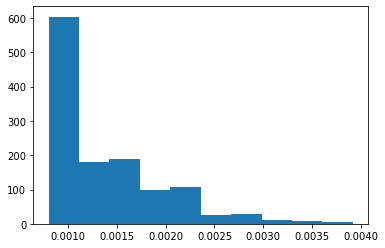

edge stat: tensor(0.7645)
mean prob: 


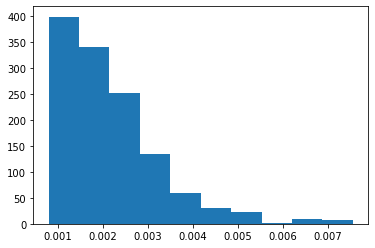

edge stat: tensor(0.4134)
mean prob: 


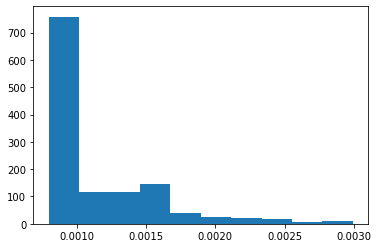

edge stat: tensor(0.2016)


In [20]:
for i in range(len(model.model.model.model)):
    print("mean prob: ")
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])
    

In [ ]:

path = '/home/lev/object-centric/edge-generation/outputs/2022-02-03/digits_minus_loss/some_project/1rwici2u/checkpoints/epoch=159-step=159.ckpt'

model, datamodule = get_model_loaders(weights_path)

batch = next(iter(datamodule.train_dataloader()))
model.model.loss_function(batch)


for i in range(len(model.model.model.model)):
    print("mean prob: ")
    plt.hist(model.model.model.model[i].edge_conv.probs.mean(dim=0).detach().cpu().numpy())
    plt.show()
    edge_index = model.model.model.model[i].edge_conv.edge_index

    edge_index = edge_index[:,torch.argsort(edge_index[1])]
    
    
    a = batch.y[edge_index[:,:]]
    print('edge stat:', torch.sum(a[0] == a[1])/a.shape[1])
    

In [ ]:
compose(config_name="config")

In [79]:
edge_index = model.model.model.model[0].edge_conv.edge_index

edge_index = edge_index[:,torch.argsort(edge_index[1])]
edge_index[:,:10]

tensor([[ 69,  53,  47,   1,  70,   5,  67,  77,  32, 102],
        [  0,   0,   0,   0,   0,   1,   1,   1,   1,   1]])

In [80]:
a = batch.y[edge_index[:,:]]
torch.sum(a[0] == a[1])/a.shape[1]

tensor(0.3448)

In [81]:
edge_index

tensor([[ 69,  53,  47,  ...,  22,  44,  94],
        [  0,   0,   0,  ..., 104, 104, 104]])

In [47]:
model.model.model.model[1].edge_conv.probs.mean(dim=1)

tensor([0.5883, 0.1155, 0.3922, 0.5807, 0.5791, 0.6228, 0.5431, 0.6227, 0.3957,
        0.5777, 0.6088, 0.3358, 0.6226, 0.3980, 0.3618, 0.5275, 0.5554, 0.0977,
        0.4389, 0.5367, 0.1147, 0.1173, 0.5845, 0.4809, 0.3240, 0.6116, 0.4419,
        0.6205, 0.2457, 0.5601, 0.6000, 0.5898, 0.4906, 0.4758, 0.6245, 0.0917,
        0.4469, 0.1162, 0.5626, 0.2235, 0.6227, 0.5933, 0.6155, 0.6136, 0.6233],
       grad_fn=<MeanBackward1>)

In [9]:
model.model


Network(
  (model): EdgeNet(
    (model): Sequential(
      (0): Sequential(
        (edge_conv): DynamicEdgeConv_DGM()
        (act): ReLU()
      )
      (1): Sequential(
        (edge_conv): DynamicEdgeConv_DGM()
      )
    )
  )
  (crossentropy): CrossEntropyLoss()
  (acc): Accuracy()
  (avr_precision): AveragePrecision()
  (aucroc): AUROC()
)